In [1]:
%matplotlib inline
#That command is called magic and allows to do inline plotting here
#Check other ipython magics at: https://ipython.org/ipython-doc/3/interactive/magics.html



In [2]:
#INFO: This is called licence/info
#Author:Daniel-Adriano Silva (dadriano@gmail.com)
#BakerLab, IPD, Seattle,WA, May/09/2017
#if True: feelFreeToAddStatetmentsAndClaimProperty
#if True: doCopyAndRedistribute
#if True: pleaseForgiveTheTypos


In [3]:
#Import libraries
import pyrosetta as pyrosetta  #This is rosetta
import numpy as numpy #This is numpy
from matplotlib import pylab as plt #This is to make plots
import time as time #NOT IMPORTANT# This is to report time

#TIP: Use Shift+Intro to execute a given cell


In [4]:
#DO NOT PAY ATTENTION TO THIS: Save current time
print "The current time is:",time.localtime()
init_class_time=time.time()


The current time is: time.struct_time(tm_year=2017, tm_mon=5, tm_mday=9, tm_hour=19, tm_min=42, tm_sec=59, tm_wday=1, tm_yday=129, tm_isdst=1)


In [5]:
#Initialize Rosetta
print "Init Rosetta and Reading Rosetta Database, be patient"
pyrosetta.init(options="-beta_nov15 -corrections::beta_nov15 -ex1 -ex2aro -constant_seed -detect_disulf FALSE -mute all ", #-ex2
             extra_options="")
print "Done"


Init Rosetta and Reading Rosetta Database, be patient
Found rosetta database at: /work/dadriano/.virtualenvs/may2017_pyrosetta_newDigs/lib/python2.7/site-packages/pyrosetta-4.0-py2.7.egg/database; using it....
PyRosetta-4 2016 [Rosetta 2016 unknown:fdd9e71c3a71b1bbd5e9e6f21327432d10df240c 2017-03-27 11:09:48 -0400] retrieved from: git@github.com:RosettaCommons/main.git
(C) Copyright Rosetta Commons Member Institutions.
Created in JHU by Sergey Lyskov and PyRosetta Team.

Done


In [7]:
#Search for a given function with name
%psearch pyrosetta.*pose*


In [8]:
#Display the declaration of a given function
pyrosetta.pose_from_pdb?


In [9]:
#Load a PDB
in_pdb_path="/work/dadriano/PyRosetta_Teaching/src_pdbs/LPC_dryRun_3lB6A_Mf14aa_order00029_ndx6_c189_2cig12p_0001_-41.8_re1_6_EEHEE_0883_0001_0002.pdb"
poseA=pyrosetta.pose_from_pdb(in_pdb_path)
print poseA


PDB file name: /work/dadriano/PyRosetta_Teaching/src_pdbs/LPC_dryRun_3lB6A_Mf14aa_order00029_ndx6_c189_2cig12p_0001_-41.8_re1_6_EEHEE_0883_0001_0002.pdb
Total residues:150
Sequence: PPSTALRELIEELVNITQNQKAPLCNGSMVWSINLTAGMYCAALESLINVSGCSAIEKTQRMLSGFCPHKVSAGQFSSLHVRDTKIEVAQFVKDLLLHLKKLFREGRFNPTAKLQDDEAEWYSRDAANAAAALAAQTRVETRNDEIRSDS
Fold tree:
FOLD_TREE  EDGE 1 109 -1  EDGE 1 110 1  EDGE 110 150 -1 


In [10]:
#Or load a PDB from a gz
in_pdb_path="/work/dadriano/PyRosetta_Teaching/src_pdbs/LPC_dryRun_3lB6A_Mf14aa_order00029_ndx6_c189_2cig12p_0001_-41.8_re1_6_EEHEE_0883_0001_0002.pdb.gz"
poseA=pyrosetta.pose_from_pdb(in_pdb_path)
print poseA


PDB file name: /work/dadriano/PyRosetta_Teaching/src_pdbs/LPC_dryRun_3lB6A_Mf14aa_order00029_ndx6_c189_2cig12p_0001_-41.8_re1_6_EEHEE_0883_0001_0002.pdb.gz
Total residues:150
Sequence: PPSTALRELIEELVNITQNQKAPLCNGSMVWSINLTAGMYCAALESLINVSGCSAIEKTQRMLSGFCPHKVSAGQFSSLHVRDTKIEVAQFVKDLLLHLKKLFREGRFNPTAKLQDDEAEWYSRDAANAAAALAAQTRVETRNDEIRSDS
Fold tree:
FOLD_TREE  EDGE 1 109 -1  EDGE 1 110 1  EDGE 110 150 -1 


In [11]:
sfd=pyrosetta.rosetta.core.io.silent.SilentFileData(pyrosetta.rosetta.core.io.silent.SilentFileOptions())
sfd.read_file("/work/dadriano/PyRosetta_Teaching/src_pdbs/LPC_dryRun_3lB6A_Mf14aa_order00029_ndx6_c189_2cig12p_0001_-41.8_re1_6_EEHEE_0883_0001_0002.silent")
sf_tags=sfd.tags()
poseA=pyrosetta.Pose()
for itag in sf_tags:
    print itag
    silent_struct = sfd.get_structure(itag)
    silent_struct.fill_pose(poseA)
    print "Pose Info:", poseA
    break   #Remove this"

LPC_dryRun_3lB6A_Mf14aa_order00029_ndx6_c189_2cig12p_0001_-41.8_re1_6_EEHEE_0883_0001_0002_0001
Pose Info: PDB file name: 
Total residues:150
Sequence: PPSTALRELIEELVNITQNQKAPLCNGSMVWSINLTAGMYCAALESLINVSGCSAIEKTQRMLSGFCPHKVSAGQFSSLHVRDTKIEVAQFVKDLLLHLKKLFREGRFNPTAKLQDDEAEWYSRDAANAAAALAAQTRVETRNDEIRSDS
Fold tree:
FOLD_TREE  EDGE 1 109 -1  EDGE 1 110 1  EDGE 110 150 -1 


In [12]:
#But what is poseA?
poseA?


In [13]:
#OK get the sequence
poseA_seq=poseA.sequence()
pose_numChains=poseA.num_chains()
print "Sequence:", poseA_seq
print "NumChain:", pose_numChains


Sequence: PPSTALRELIEELVNITQNQKAPLCNGSMVWSINLTAGMYCAALESLINVSGCSAIEKTQRMLSGFCPHKVSAGQFSSLHVRDTKIEVAQFVKDLLLHLKKLFREGRFNPTAKLQDDEAEWYSRDAANAAAALAAQTRVETRNDEIRSDS
NumChain: 2


In [14]:
#WOW!!! I want the angles, how do I do it???
%psearch poseA.*phi*


In [15]:
#Get the angles?
poseA.phi?


In [16]:
#OK get the angles:
print "The size of this pose is: ", poseA.size()
print "And the angles are:"
for indx in xrange(1, poseA.size()+1): #Remmeber that rosetta is Odd and uses +1 indexes
    print indx, poseA.phi(indx), poseA.psi(indx), poseA.omega(indx)


The size of this pose is:  150
And the angles are:
1 0.0 143.936846773 -168.872937328
2 -61.4870236988 -23.10161563 -179.528176756
3 -81.8399083821 -7.40404873998 -175.996513911
4 -54.1442362569 -51.1353851588 -177.030949849
5 -59.3975921385 -43.2295843025 -177.728017184
6 -68.8576457408 -40.813745137 176.650717297
7 -54.8124949828 -51.1581862813 -177.571378124
8 -65.8579010101 -39.6248314858 176.300787581
9 -62.5205248453 -46.4090011713 176.376933124
10 -57.7226884595 -45.1404471155 -179.722359652
11 -58.2299569634 -40.9956599406 -179.691450327
12 -66.6737106559 -42.8896130325 179.290353224
13 -66.8124802238 -35.9928757076 172.366801421
14 -60.834456991 -51.03494942 177.865489658
15 -48.3724351612 -59.3959844726 -173.897777837
16 -80.3304047945 16.1786772051 171.070154733
17 -114.817289818 -4.91080382419 -176.055882142
18 -119.418240497 -41.9745618424 -173.537036331
19 -101.356482872 33.8710878164 175.767478032
20 -117.5648983 98.8198828449 -175.041475839
21 -65.95684214 -34.698186755

In [17]:
#Haha let's modify the angles to my desire:

poseA_goodCopy=poseA.clone()
for ires in xrange(1, poseA.size()+1):
    if (poseA_seq[ires-1] == 'M') or (poseA_seq[ires-1] == 'A'): #Python works "normally", meaning 0-ndx
        print poseA_seq[ires-1], ires
        print "<",indx, poseA_goodCopy.phi(ires), poseA_goodCopy.psi(ires), poseA_goodCopy.omega(ires)
        poseA_goodCopy.set_phi(ires, (numpy.random.random()*360)-180)
        poseA_goodCopy.set_psi(ires, (numpy.random.random()*360)-180)
        print ">", indx, poseA_goodCopy.phi(ires), poseA_goodCopy.psi(ires), poseA_goodCopy.omega(ires)
                                                                                                 

A 5
< 150 -59.3975921385 -43.2295843025 -177.728017184
> 150 -134.208833837 -24.2254633966 -177.728017184
A 22
< 150 -104.988157659 167.868434604 175.801521114
> 150 -121.976048038 -92.6978222942 175.801521114
M 29
< 150 -107.759511482 139.429534086 -179.064175996
> 150 -103.828560845 100.013157419 -179.064175996
A 37
< 150 -58.939969031 129.51148529 179.969144124
> 150 -54.1001999474 139.627931477 179.969144124
M 39
< 150 -63.3884193885 -14.5532080631 177.375505403
> 150 -39.0350075788 -146.167401921 177.375505403
A 42
< 150 -60.2063006253 -41.0097524095 179.900007802
> 150 116.461385853 -121.733872884 179.900007802
A 43
< 150 -59.4854818145 -41.6471402543 177.278403193
> 150 161.813500124 8.97363095403 177.278403193
A 55
< 150 -55.766935751 -24.893719198 -177.417809844
> 150 146.326888316 -163.891054375 -177.417809844
M 62
< 150 -53.2058905034 -49.0121652313 -179.124262763
> 150 -119.744464887 143.209611871 -179.124262763
A 73
< 150 -58.5522607215 137.612554421 -179.802960244
> 150 -

[]

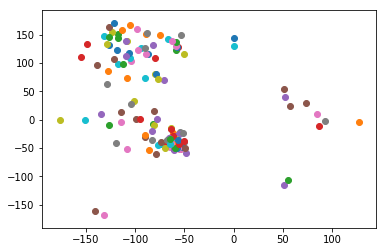

In [18]:
#Plot the phi,psi of the original protein
plot=plt.subplot()
for ires in xrange(1, poseA.size()+1):
    plot.scatter( poseA.phi(ires), poseA.psi(ires))
plot.plot()  


[]

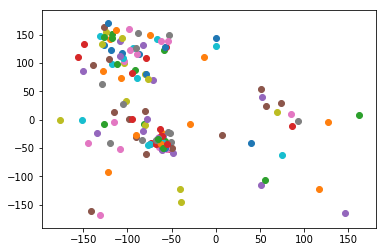

In [19]:
#Plot the phi,psi of the original protein
plot=plt.subplot()
for ires in xrange(1, poseA.size()+1):
    plot.scatter( poseA_goodCopy.phi(ires), poseA_goodCopy.psi(ires))
plot.plot() 

In [20]:
#Out_the_modified_pose
mod_pdb_out_path="/work/dadriano/tmp/test_mod_pose.pdb"
status_out=poseA_goodCopy.dump_pdb(mod_pdb_out_path)
print status_out


True


In [21]:
#Import some extra-usefull module
import nglview as thisIsNotPymol


In [22]:
#Display the original protein
print "This is the structure of the original model (IL13-wannabe-inhibitor)"
proteinView = thisIsNotPymol.NGLWidget()
view=thisIsNotPymol.show_structure_file(in_pdb_path)
view


This is the structure of the original model (IL13-wannabe-inhibitor)


In [23]:
#Display the modified protein
print "This is the structure of the modified structure"
proteinView = thisIsNotPymol.NGLWidget()
view=thisIsNotPymol.show_structure_file(mod_pdb_out_path)
view


This is the structure of the modified structure


In [25]:
#print some unecessary information
end_class_time=time.time()
print "This class wall time was: %d secods"%(end_class_time-init_class_time)


This class wall time was: 87 secods


In [26]:
print "HOMEWORK1. Do this: \n\n poseA_badCopy=poseA \n\nQUESTION: What happen if you modify the angles for \"poseA_badCopy\"?" 


HOMEWORK1. Do this: 

 poseA_badCopy=poseA 

QUESTION: What happen if you modify the angles for "poseA_badCopy"?


In [27]:
print "HOMEWORK2. It should be pretty-pretty simple (less than 200-400 lines of code maybe), almost trivial, to build a cheap-fragment assembler for de-novo (blue-print style) with this, can you?
print "A silent file with the most common fragments of the PDB can be found here: ", 


Object `you` not found.
A silent file with the most common fragments of the PDB can be found here: 


In [ ]:
print "HOMEWORK2. It should be pretty-pretty simple (less than 200-400 lines of code maybe), almost trivial, to build a cheap-fragment assembler for de-novo (blue-print style) with this, can you

In [ ]:
print "HOMEWORK2. It should be pretty-pretty simple (less than 200-400 lines of code maybe), almost trivial, to build a cheap-fragment assembler for de-novo (blue-print style) with this, can you